In [ ]:
!pip3 install kmodes

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.linear_model import LinearRegression, Lasso # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from kmodes.kprototypes import KPrototypes

%matplotlib inline

In [4]:
nyc = pd.read_csv("/Users/sevesilvestre/Desktop/AB_NYC_2019.csv")

In [5]:
nyc = nyc.drop(["latitude", "longitude", "last_review", "host_name", "id", "host_id", "name"], axis = 1)
nyc.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
dummies_neighbourhood = pd.get_dummies(nyc["neighbourhood_group"])
dummies_room = pd.get_dummies(nyc["room_type"])

nyc = pd.concat([nyc,dummies_neighbourhood], axis = 1)
nyc = pd.concat([nyc,dummies_room], axis = 1)

nyc = nyc.dropna()
nyc.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0


Seve's Questions


### How are AirBNB rentals distributed among the five boroughs of New York?

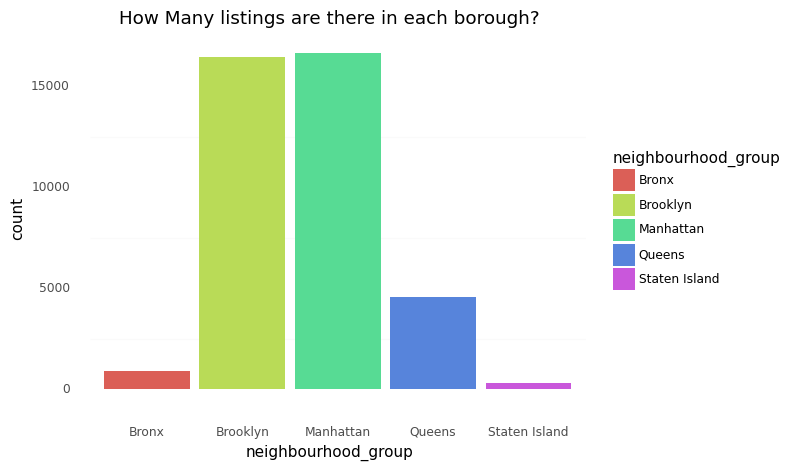

<ggplot: (8746656968149)>

In [ ]:
ggplot(nyc, aes(x = "neighbourhood_group", fill = "neighbourhood_group")) + geom_bar() + theme_minimal() + theme(panel_grid_major = element_blank()) + labs(title = "How Many listings are there in each borough?")

This bar chart displays the number of AirBNB listings in each borough. We can see that out the 5 boroughs, Manhattan has the most number of listings and Brooklyn has the 2nd most highest number of listings. On the other hand, Staten Island has the least number of AirBNB listings and Bronx comes in with the 2nd lowest number of listings. 

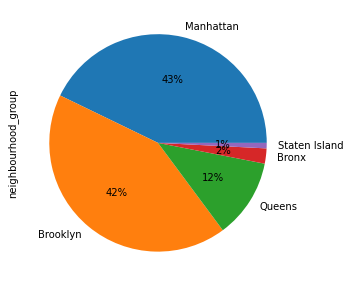

In [ ]:
listings = nyc['neighbourhood_group'].value_counts()
plot = listings.plot.pie(y='count', figsize=(5, 5), autopct='%1.0f%%')

This pie chart displays the proportion of listings in each burough. We can see that Manhattan contains 43% of all NYC AirBNB listings while Staten Island only contains 1% of all the listings. We can see that the majority of this dataset is consumed of listings located in Manhattan and Brooklyn making up 85% of all data in this dataset. 

a) In order to determine the rental distribution among the five boroughs, we would only need to use visualization to display the data in an easy and understandable way to our audience.

b) **Answer:** To answer our question, we can see that 85% of the rentals are distributed across both Manhattan and Brooklyn while Staten Island only represents 1% of the dataset and Bronx represents 2% of the dataset. Although a simple question, this is a very important question we must first answer to see where our team can branch off from this question to ask better questions that'll lead to great answers. This data could be used for people in the Real Estate Industry looking to enter the AirBNB rental industry. From this data, we can see that the most popular places customers enjoy renting are in both Manhattan and Brooklyn and the least popular places to rent are in Staten Island and Bronx. This can be valuable information to a renter who is unsure of which borough they should purchase a property to rent out, which in this case, it would be Manhattan or Brooklyn.

### What is the price distribution of AirBNB rentals among the five boroughs? 

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365","Bronx", "Brooklyn","Manhattan","Queens","Staten Island", "Entire home/apt","Private room", "Shared room"]
#cont = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]
X = nyc[predictors]
y = nyc["price"]

z = StandardScaler()
X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]] = z.fit_transform(X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]])

lr = LinearRegression()
lr.fit(X,y)

coefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(coefficients)

         Coef                            Name
0   -3.472664                  minimum_nights
1   -9.131154               number_of_reviews
2   -0.921996               reviews_per_month
3   -0.858590  calculated_host_listings_count
4   21.734756                availability_365
5  -25.502482                           Bronx
6   10.626720                        Brooklyn
7   58.071910                       Manhattan
8   -8.817578                          Queens
9  -34.378571                   Staten Island
10  80.897566                 Entire home/apt
11 -24.275597                    Private room
12 -56.621970                     Shared room


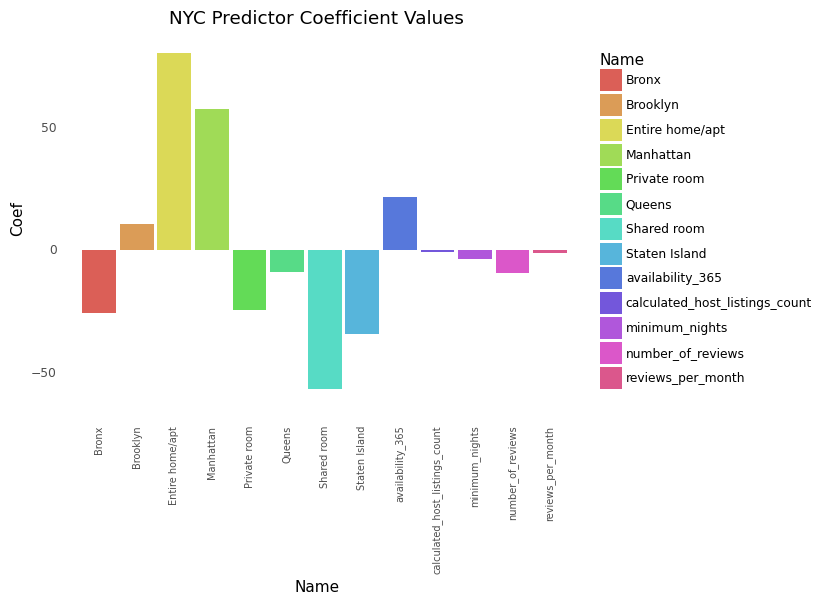

<ggplot: (8746644062165)>

In [ ]:
ggplot(coefficients, aes(x = "Name" , y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "NYC Predictor Coefficient Values") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90))

This bar chart displays the coefficient values of each value on their affect on AirBNB prices. Based on this chart, we notice that if a listing is an Entire home/apt, that tends to bump up the price the most compared to any other variable. Another variable that will increase price is if the listing is located in Manhattan. Variables such as Shared room and Staten Island present a negative coefficient value meaning that if a listing contains these variables, they tend to decrease the price of a listing. Variables that are valued at 0 tend to have 0 effect on the price of an AirBNB listing such as availability and number of reviews. 

In [ ]:
Brooklyn = nyc.loc[nyc['neighbourhood_group'] == "Brooklyn"]

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
X = Brooklyn[predictors]
y = Brooklyn["price"]

z = StandardScaler()
X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]] = z.fit_transform(X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]])

lr = LinearRegression()
lr.fit(X,y)

brooklyncoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(brooklyncoefficients)

        Coef                            Name
0  -3.265494                  minimum_nights
1  -4.758080               number_of_reviews
2  -4.704148               reviews_per_month
3  -1.712594  calculated_host_listings_count
4  14.796535                availability_365
5  77.814337                 Entire home/apt
6 -21.447898                    Private room
7 -56.366439                     Shared room


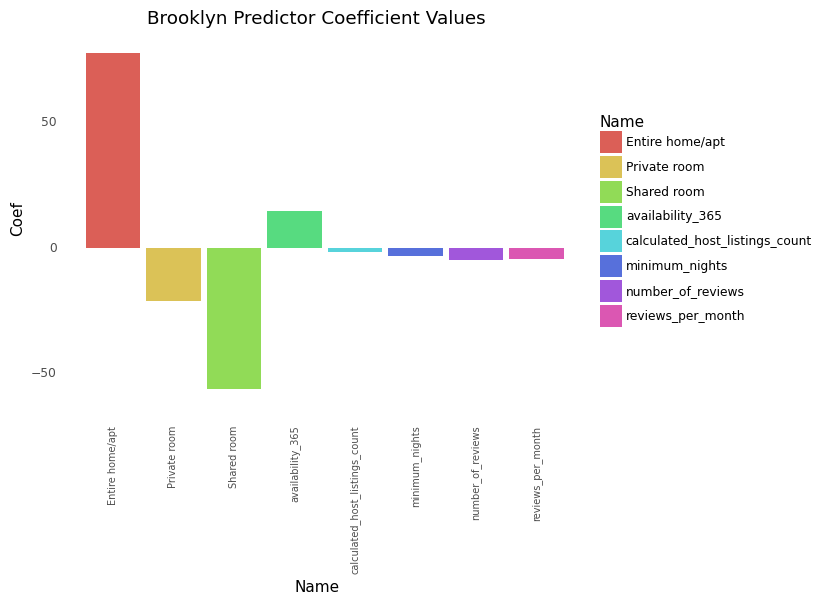

<ggplot: (8746654257993)>

In [ ]:
ggplot(brooklyncoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "Brooklyn Predictor Coefficient Values") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90))

This bar chart looks at the coefficient values for each variable specifically for listings in Brooklyn. The Entire home/apt variable influences price the most while shared room decreases the price the most. 

In [ ]:
Bronx = nyc.loc[nyc['neighbourhood_group'] == "Bronx"]

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
X = Bronx[predictors]
y = Bronx["price"]

z = StandardScaler()
X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]] = z.fit_transform(X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]])

lr = LinearRegression()
lr.fit(X,y)

bronxcoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(bronxcoefficients)

        Coef                            Name
0  -8.558835                  minimum_nights
1  -3.056780               number_of_reviews
2  -6.883496               reviews_per_month
3   3.361904  calculated_host_listings_count
4   7.483305                availability_365
5  48.240589                 Entire home/apt
6 -21.384691                    Private room
7 -26.855898                     Shared room


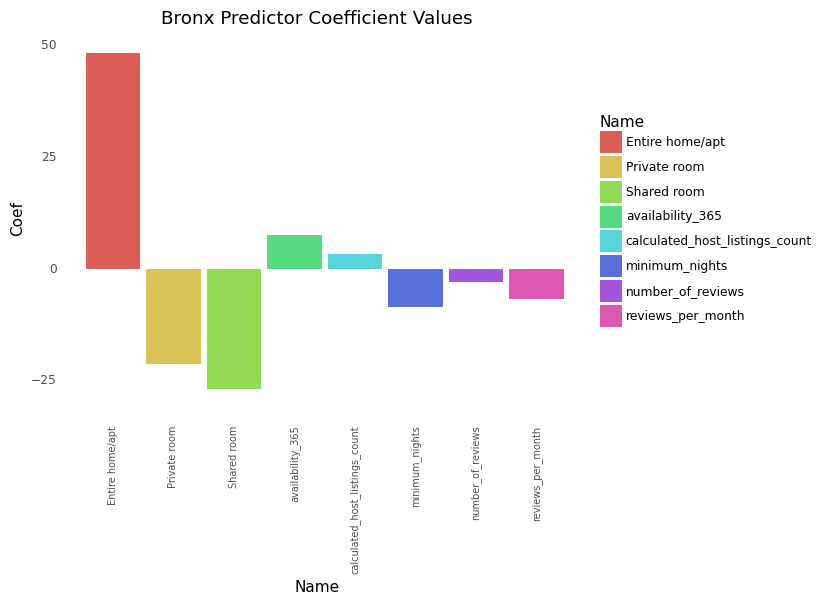

<ggplot: (8746654265057)>

In [ ]:
ggplot(bronxcoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "Bronx Predictor Coefficient Values") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90))

This bar chart looks at the coefficient values for each variable specifically for listings in the Bronx. The Entire home/apt variable influences price the most while shared room decreases the price the most. Compared to Brooklyn, Shared rooms does not decrease the price as drastically since the coefficient value is less negative than the Brooklyn coefficient.

In [ ]:
Manhattan = nyc.loc[nyc['neighbourhood_group'] == "Manhattan"]

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
X = Manhattan[predictors]
y = Manhattan["price"]

z = StandardScaler()
X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]] = z.fit_transform(X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]])

lr = LinearRegression()
lr.fit(X,y)

manhattancoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(manhattancoefficients)

        Coef                            Name
0  -7.839098                  minimum_nights
1 -14.260333               number_of_reviews
2   4.590567               reviews_per_month
3  -5.359820  calculated_host_listings_count
4  34.379178                availability_365
5  96.040355                 Entire home/apt
6 -26.475312                    Private room
7 -69.565043                     Shared room


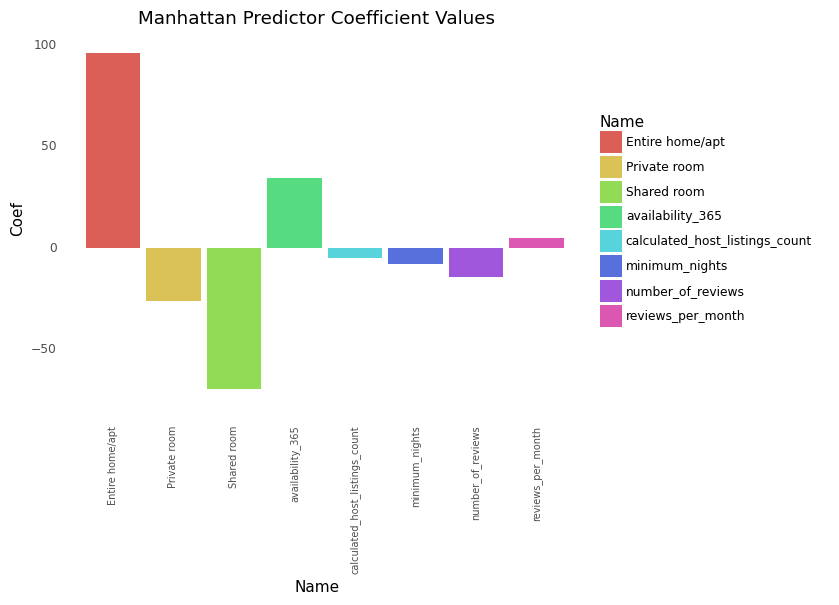

<ggplot: (8746654265017)>

In [ ]:
ggplot(manhattancoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "Manhattan Predictor Coefficient Values") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90))

This bar chart looks at the coefficient values for each variable specifically for listings in Manhattan. The Entire home/apt variable influences price the most while shared room decreases the price at a higher intensity compared to both Brooklyn and Bronx coefficients with a more negative value. We also see that the Entire home/apt coefficient almost reaches 100 showing how much of an impact this variable has on price compared to all other boroughs. Availability in Manhattan also plays a positive role in increasing price the most out of any borough.

In [ ]:
Queens= nyc.loc[nyc['neighbourhood_group'] == "Queens"]

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
X = Queens[predictors]
y = Queens["price"]

z = StandardScaler()
X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]] = z.fit_transform(X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]])

lr = LinearRegression()
lr.fit(X,y)

queenscoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(queenscoefficients)

        Coef                            Name
0  17.409369                  minimum_nights
1  -4.235861               number_of_reviews
2  -3.083995               reviews_per_month
3  -9.050533  calculated_host_listings_count
4   7.624395                availability_365
5  48.468286                 Entire home/apt
6 -19.422438                    Private room
7 -29.045848                     Shared room


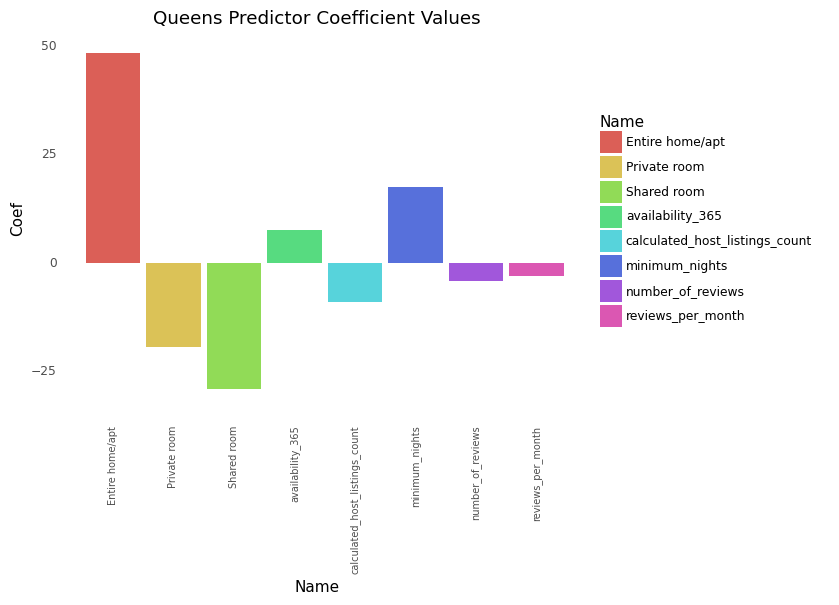

<ggplot: (8746643917049)>

In [ ]:
ggplot(queenscoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "Queens Predictor Coefficient Values") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90))

This bar chart looks at the coefficient values for each variable specifically for listings in Queens. The Entire home/apt variable influences price the most while shared room decreases the price the most. Minimum nights is the second variable the influences a positive impact the most to price. 

In [ ]:
Staten = nyc.loc[nyc['neighbourhood_group'] == "Staten Island"]

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
X = Staten[predictors]
y = Staten["price"]

z = StandardScaler()
X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]] = z.fit_transform(X[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]])

lr = LinearRegression()
lr.fit(X,y)

statencoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(statencoefficients)

        Coef                            Name
0  -4.289631                  minimum_nights
1  -4.531232               number_of_reviews
2 -10.517525               reviews_per_month
3  -6.977360  calculated_host_listings_count
4   6.546576                availability_365
5  42.557895                 Entire home/apt
6 -25.587432                    Private room
7 -16.970463                     Shared room


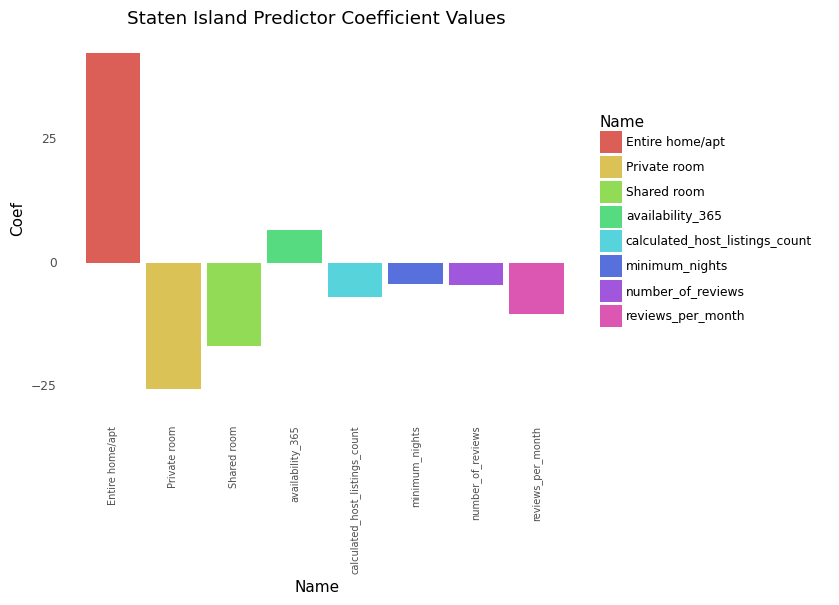

<ggplot: (8746643916909)>

In [ ]:
ggplot(statencoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "Staten Island Predictor Coefficient Values") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90))

This bar chart looks at the coefficient values for each variable specifically for listings in Staten Island. The Entire home/apt variable influences price the most while private decreases the price the most. This is the only borough where we see a different variables negatively impacting price the most. 

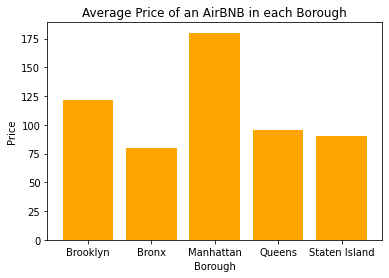

Average price in Brooklyn: 121.44871405119474
Average price in Bronx: 79.55365296803653
Average price in Manhattan: 180.05248917748918
Average price in Queens: 95.76257105378225
Average price in Staten Island: 89.96496815286625


In [ ]:
brooklynprice = Brooklyn["price"].mean()
bronxprice = Bronx["price"].mean()
manhattanprice = Manhattan["price"].mean()
queensprice = Queens["price"].mean()
statenprice = Staten["price"].mean()

averageprice = {"Brooklyn": brooklynprice, "Bronx": bronxprice, "Manhattan": manhattanprice, "Queens": queensprice,
               "Staten Island": statenprice}

plt.bar(list(averageprice.keys()), averageprice.values(), color = "orange")
plt.xlabel('Borough')
plt.ylabel('Price')
plt.title('Average Price of an AirBNB in each Borough')
plt.show()

print("Average price in Brooklyn:", brooklynprice)
print("Average price in Bronx:", bronxprice)
print("Average price in Manhattan:", manhattanprice)
print("Average price in Queens:", queensprice)
print("Average price in Staten Island:", statenprice)

This bar chart displays the average price of an AirBNB listing in each borough. Manhattan averages the highest prices at 180/night while Bronx averages the lowest prices at 80/night. 

a) We want to analyze which variables affect the pricing in each borough to determine if some variables have a higher impact on price in certain boroughs than others. To do this, we plan to scale all variables (z-score) since we will be using all variables and want them to be on the same scale. Using linear regression, we can create a model to see which variables produce the highest coefficients against price. 

b) **Answer:** To answer our question, the price distribution of AirBNB rentals across the five buroughs are 180/night in Manhattan, 121/night in Brooklyn, 96/night in Queens, 90/night in Staten Island, and 80/night in the Bronx. As a AirBNB host, its important to know what the average price listings in the area of your listing to see if you are pricing too high or too low. This could prevent extra profits or prevent more rentals. Through our question, we also analyzed what factors tend to affect the price of an AirBNB in each borough the most and the least. From our studies, we've concluded that AirBNB listings that provide the customer an entire home/apartment tended to cause prices to jump, while shared rooms tended to causes prices to dip. This type of information would be very useful for AirBNB hosts struggling to determine the perfect price to their AriBNB and can even assist Real Estate Agents interested in the AirBNB industry to determine what kind of property in which borough they should try to purchase if they are trying to obtain the most profit, which would be Entire homes and apartments. 

### What can we learn from a clustering model of all the brooklyn listings using price and room_types as variables?

In [ ]:
Brooklyn.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0
12,Brooklyn,South Slope,Private room,89,4,167,1.34,3,314,0,1,0,0,0,0,1,0
15,Brooklyn,Williamsburg,Entire home/apt,140,2,148,1.20,1,46,0,1,0,0,0,1,0,0


In [ ]:
Brooklyndrop = Brooklyn.drop(["neighbourhood", "neighbourhood_group", "minimum_nights", "number_of_reviews", "reviews_per_month", 
                              "calculated_host_listings_count","availability_365", "Bronx", "Brooklyn", 
                              "Manhattan", "Queens", "Staten Island", "Entire home/apt", "Private room", "Shared room"], axis = 1)
Brooklyndrop.head()

,room_type,price
0,Private room,149
3,Entire home/apt,89
6,Private room,60
12,Private room,89
15,Entire home/apt,140


In [ ]:
brooklyn_array = Brooklyndrop.values

kproto = KPrototypes(n_clusters = 3, verbose = 2, max_iter = 20)
clusters = kproto.fit_predict(brooklyn_array, categorical = [0])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4846, ncost: 351020315.1788711
Run: 1, iteration: 2/20, moves: 3197, ncost: 331328990.0658771
Run: 1, iteration: 3/20, moves: 1760, ncost: 313318683.5212748
Run: 1, iteration: 4/20, moves: 1246, ncost: 296888722.93207055
Run: 1, iteration: 5/20, moves: 854, ncost: 272669576.29560834
Run: 1, iteration: 6/20, moves: 778, ncost: 227873870.00459364
Run: 1, iteration: 7/20, moves: 824, ncost: 149454420.71002194
Run: 1, iteration: 8/20, moves: 569, ncost: 114268556.09226616
Run: 1, iteration: 9/20, moves: 285, ncost: 113851286.09381653
Run: 1, iteration: 10/20, moves: 127, ncost: 113762414.2607338
Run: 1, iteration: 11/20, moves: 41, ncost: 113737013.9422454
Run: 1, iteration: 12/20, moves: 455, ncost: 111998192.65849985
Run: 1, iteration: 13/20, moves: 103, ncost: 111876719.129948
Run: 1, iteration: 14/20, moves: 44, ncost: 

In [ ]:
print(kproto.cluster_centroids_)

[['96.60850156572722' 'Private room']
 ['351.1320754716981' 'Entire home/apt']
 ['6428.571428571428' 'Entire home/apt']]


In [ ]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(str(c))
    
Brooklyndrop['cluster'] = cluster_dict

Brooklyndrop.head()

,room_type,price,cluster
0,Private room,149,0
3,Entire home/apt,89,0
6,Private room,60,0
12,Private room,89,0
15,Entire home/apt,140,0


In [ ]:
Brooklyndrop[Brooklyndrop['cluster'] == "0"].head(10)

,room_type,price,cluster
0,Private room,149,0
3,Entire home/apt,89,0
6,Private room,60,0
12,Private room,89,0
15,Entire home/apt,140,0
16,Entire home/apt,215,0
18,Entire home/apt,99,0
21,Private room,130,0
22,Private room,80,0
23,Private room,110,0


In [ ]:
Brooklyndrop[Brooklyndrop['cluster'] == "1"].head(10)

,room_type,price,cluster
20,Entire home/apt,299,1
52,Entire home/apt,228,1
66,Entire home/apt,225,1
68,Entire home/apt,275,1
85,Entire home/apt,800,1
93,Entire home/apt,250,1
116,Entire home/apt,325,1
121,Entire home/apt,400,1
140,Entire home/apt,250,1
158,Entire home/apt,475,1


In [ ]:
Brooklyndrop[Brooklyndrop['cluster'] == "2"].head(10)

,room_type,price,cluster
4345,Private room,5000,2
4376,Entire home/apt,4500,2
4377,Entire home/apt,8000,2
17692,Entire home/apt,10000,2
25825,Entire home/apt,5000,2
26739,Entire home/apt,5000,2
45666,Private room,7500,2


In [ ]:
cluster0 = Brooklyndrop.loc[Brooklyndrop['cluster'] == "0"]
cluster1 = Brooklyndrop.loc[Brooklyndrop['cluster'] == "1"]
cluster2 = Brooklyndrop.loc[Brooklyndrop['cluster'] == "2"]

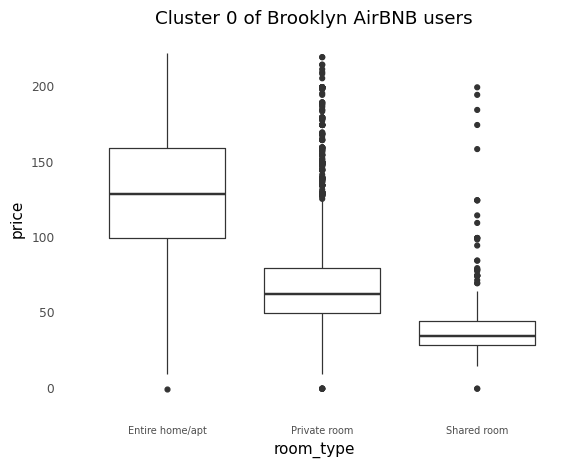

<ggplot: (8746656990857)>

In [ ]:
ggplot(cluster0, aes(x = "room_type", y = "price")) + geom_boxplot() + theme_minimal() + labs(title = "Cluster 0 of Brooklyn AirBNB users") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This boxplot displays the price distribution of each room type for our first cluster, "Cluster 0". Customers in this cluster tend to spend around 131/night for an entire home/apartment, around 68/night for a private room, and around 43/night for a shared room. The dots on on each boxplot also display any outliers on certain data points that fit in our cluster but are not near the mean price for each room type. 

In [ ]:
cluster0entire = cluster0.loc[cluster0["room_type"] == "Entire home/apt"]
cluster0private = cluster0.loc[cluster0["room_type"] == "Private room"]
cluster0shared = cluster0.loc[cluster0["room_type"] == "Shared room"]

print("Number of Listings for Entire home/apt in Cluster 0:", len(cluster0entire))
print("Number of Listings for Private room in Cluster 0:", len(cluster0private))
print("Number of Listings for Shared room in Cluster 0:", len(cluster0shared))
print("Average price of Listing in Cluster 0: $", cluster0["price"].mean())

print("Average price of Entire Home/Apartment in Cluster 0: $", cluster0entire["price"].mean())
print("Average price of Private Room in Cluster 0: $", cluster0private["price"].mean())
print("Average price of Shared Room in Cluster 0: $", cluster0shared["price"].mean())

Number of Listings for Entire home/apt in Cluster 0: 6804
Number of Listings for Private room in Cluster 0: 7918
Number of Listings for Shared room in Cluster 0: 287
Average price of Listing in Cluster 0: $ 96.60850156572722
Average price of Entire Home/Apartment in Cluster 0: $ 131.76116990005877
Average price of Private Room in Cluster 0: $ 68.348825460975
Average price of Shared Room in Cluster 0: $ 42.88501742160279


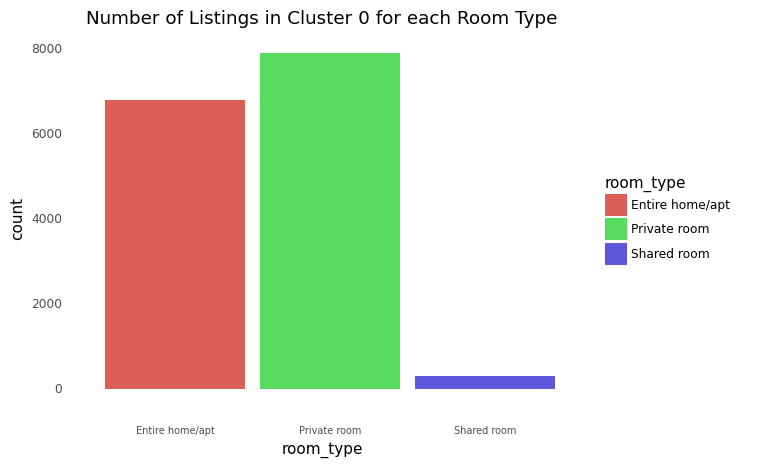

<ggplot: (8746644866045)>

In [ ]:
ggplot(cluster0, aes(x = "room_type", fill = "room_type")) + geom_bar() + theme_minimal() + labs(title = "Number of Listings in Cluster 0 for each Room Type") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This bar chart describes the number of listings for each room type in our first cluster, "Cluster 0". Customers who rented out private rooms consisted of most of the data points in this cluster while Entire homes and apartments were rented out second most in this cluster. Not many customers in this cluster rented out a shared room comapred to the other room types, but this cluster represents most of all renters who rented our shared rooms in this whole dataset as we will see in the next charts. 

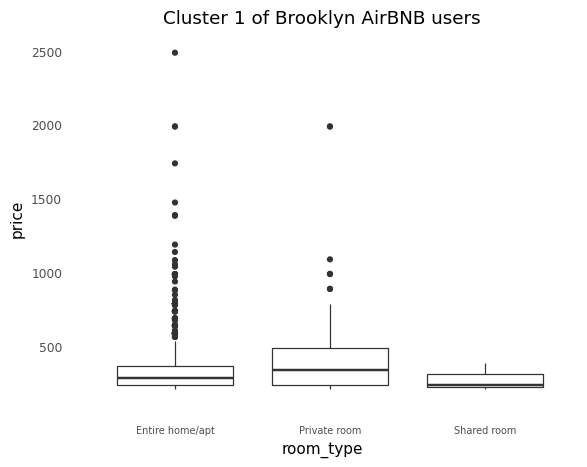

<ggplot: (8746644693053)>

In [ ]:
ggplot(cluster1, aes(x = "room_type", y = "price")) + geom_boxplot() + theme_minimal() + labs(title = "Cluster 1 of Brooklyn AirBNB users") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This boxplot displays the price distribution of each room type for our second cluster, "Cluster 1". Customers in this cluster tend to spend around 346/night for an entire home/apartment, around 445/night for a private room, and around 292/night for a shared room. The dots on on each boxplot also display any outliers on certain data points that fit in our cluster but are not near the mean price for each room type. We see that prices for Entire home and apartment in this cluster can go all the way to 2500/night. 

In [ ]:
cluster1entire = cluster1.loc[cluster1["room_type"] == "Entire home/apt"]
cluster1private = cluster1.loc[cluster1["room_type"] == "Private room"]
cluster1shared = cluster1.loc[cluster1["room_type"] == "Shared room"]

print("Number of Listings for Entire home/apt in Cluster 1:", len(cluster1entire))
print("Number of Listings for Private room in Cluster 1:", len(cluster1private))
print("Number of Listings for Shared room in Cluster 1:", len(cluster1shared))
print("Average price of Listing in Cluster 1: $", cluster1["price"].mean())

print("Average price of Entire Home/Apartment in Cluster 1: $", cluster1entire["price"].mean())
print("Average price of Private Room in Cluster 1: $", cluster1private["price"].mean())
print("Average price of Shared Room in Cluster 1: $", cluster1shared["price"].mean())

Number of Listings for Entire home/apt in Cluster 1: 1355
Number of Listings for Private room in Cluster 1: 73
Number of Listings for Shared room in Cluster 1: 3
Average price of Listing in Cluster 1: $ 351.1320754716981
Average price of Entire Home/Apartment in Cluster 1: $ 346.18154981549816
Average price of Private Room in Cluster 1: $ 445.4657534246575
Average price of Shared Room in Cluster 1: $ 291.6666666666667


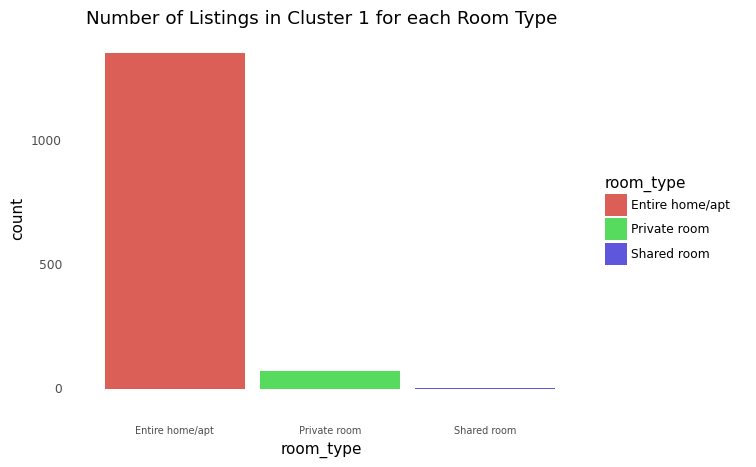

<ggplot: (8746657294393)>

In [ ]:
ggplot(cluster1, aes(x = "room_type", fill = "room_type")) + geom_bar() + theme_minimal() + labs(title = "Number of Listings in Cluster 1 for each Room Type") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This bar chart describes the number of listings for each room type in our second cluster, "Cluster 1". Customers who rented out Entire homes and apartments consisted of most of the data points in this cluster while both private rooms and shared rooms were barely rented out in this cluster. 

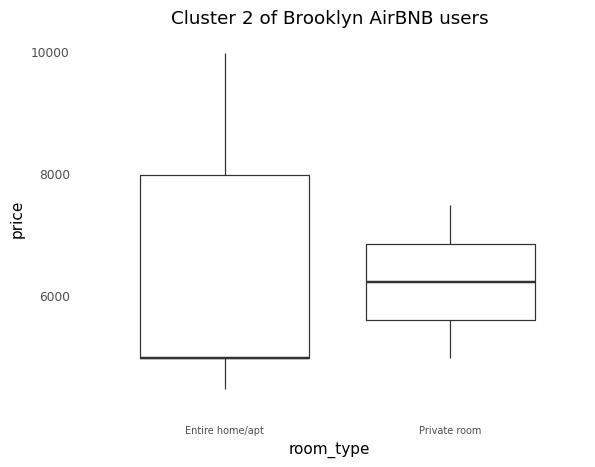

<ggplot: (8746644644321)>

In [ ]:
ggplot(cluster2, aes(x = "room_type", y = "price")) + geom_boxplot() + theme_minimal() + labs(title = "Cluster 2 of Brooklyn AirBNB users") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This boxplot displays the price distribution of each room type for our third cluster, "Cluster 2". Customers in this cluster tend to spend around 6500/night for an entire home/apartment, around 6250/night for a private room, and no customers in this cluster rented out a shared room. The box for an entire home/apartment shows that customers in this cluster are willing to pay from 5000 to 8000 per night and 5750 to 7000 per night for a private room. 

In [ ]:
cluster2entire = cluster2.loc[cluster2["room_type"] == "Entire home/apt"]
cluster2private = cluster2.loc[cluster2["room_type"] == "Private room"]
cluster2shared = cluster2.loc[cluster2["room_type"] == "Shared room"]

print("Number of Listings for Entire home/apt in Cluster 2:", len(cluster2entire))
print("Number of Listings for Private room in Cluster 2:", len(cluster2private))
print("Number of Listings for Shared room in Cluster 2:", len(cluster2shared))
print("Average price of Listing in Cluster 2: $", cluster2["price"].mean())

print("Average price of Entire Home/Apartment in Cluster 2: $", cluster2entire["price"].mean())
print("Average price of Private Room in Cluster 2: $", cluster2private["price"].mean())
print("Average price of Shared Room in Cluster 2: $", cluster2shared["price"].mean())

Number of Listings for Entire home/apt in Cluster 2: 5
Number of Listings for Private room in Cluster 2: 2
Number of Listings for Shared room in Cluster 2: 0
Average price of Listing in Cluster 2: $ 6428.571428571428
Average price of Entire Home/Apartment in Cluster 2: $ 6500.0
Average price of Private Room in Cluster 2: $ 6250.0
Average price of Shared Room in Cluster 2: $ nan


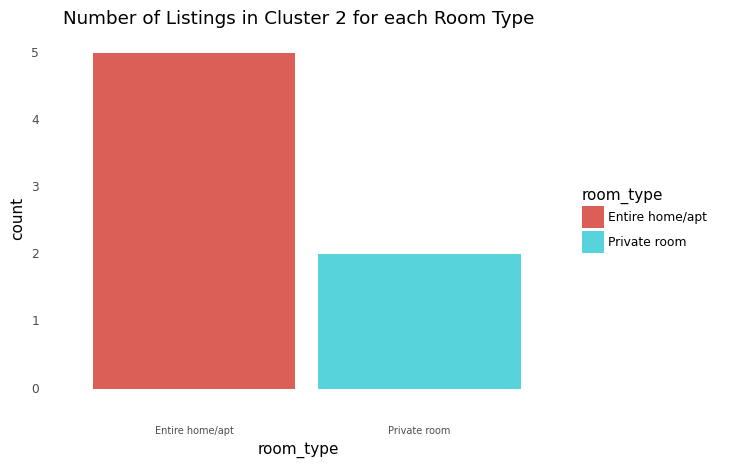

<ggplot: (8746644866137)>

In [ ]:
ggplot(cluster2, aes(x = "room_type", fill = "room_type")) + geom_bar() + theme_minimal() + labs(title = "Number of Listings in Cluster 2 for each Room Type") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This bar chart describes the number of listings for each room type in our third cluster, "Cluster 2". This cluster only contains 5 customers who rented out an entire home/apartment and only 2 customers who rented out a private room. No customer in this cluster rented a shared room. 

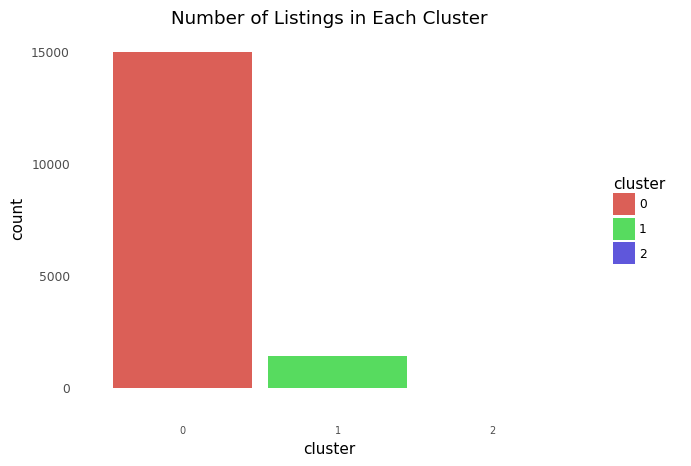

<ggplot: (8746644822425)>

In [ ]:
ggplot(Brooklyndrop, aes(x = "cluster", fill = "cluster")) + geom_bar() + theme_minimal() + labs(title = "Number of Listings in Each Cluster") + theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7))

This bar chart shows the distribution of listings for each cluster. Cluster 0 has the most listings with 15009 listings while cluster 1 only has 1431 listings and cluster 2 has only 7 listings. 

In [ ]:
print("Number of Listings in Cluster 0:", len(cluster0))
print("Number of Listings in Cluster 1:", len(cluster1))
print("Number of Listings in Cluster 2:", len(cluster2))

Number of Listings in Cluster 0: 15009
Number of Listings in Cluster 1: 1431
Number of Listings in Cluster 2: 7


a) To answer this question, we used K-Prototype since it's one of the few clustering methods that can cluster mixed data sets since our clustering method will include room_type (categorical) and price (continuous).

b) **Answer:** Utilizing Kmodes/KPrototype clustering to create a model of all the brooklyn listings using price and room_types as variables, we were able to learn several things. We learned that a large majority of listings are a part of cluster 0, which are listings with the lower average price across all room types. This cluster could represent customers who do not have a preference on any room type, rather they want the cheapest price they can get. We can assume this because this cluster contained the most private room listings and shared room listings. The average price a customer would spend in this cluster is 97/night. The second largest cluster was cluster 1 which represent listings that are mainly entire home and apartments at a slightly higher price point. This cluster could represent customers who potentially have a larger party and need to book a full house and are willing to pay up from 300 to 2000 dollars for an entire home or apartment. Finally, cluster 2 represents listings for those with BIG money. Avergae prices in this cluster are at around 6000/night and only very wealthy customers will be able to afford listings in this cluster. There are only 7 listings in this cluster so there isn't a great demand for listings like those in cluster 2. This clustering model could be of very big use of a Real Estate Company or any AirBNB host. Each cluster tells valuable information of groups they can target. Each cluster has a specific characteristic that stands out from other clusters and hosts can get an idea of what the AirBNB industry looks like. This will allow potential hosts to make real estate decisions to see if they are targetting customers who want to pay the lowest price, customers who will pay a solid price for an entire home/apartment, or customers who are willing to break their bank to rent out a nice place temporarily. 

### 4) What can we learn from predictions about the reviews per month?

I changed the first bar chart into one that shows a comparison of the reviews per month and the variable "Entire home/apt". I changed this because I ran the linear regression over the whole variable "reviews_per_month" rather than just a specific range since I think its more important to see how the entire variable is affected in total to get a general understanding.

In [ ]:
predictors = ["number_of_reviews","price", "minimum_nights", "availability_365", "calculated_host_listings_count"]
X = nyc[predictors]
y = nyc["reviews_per_month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

coefficients4 = pd.DataFrame({"Coef":linreg.coef_,
              "Name": predictors})
print(coefficients4)

# predictions
y_pred = linreg.predict(X_test)
y_pred2 = linreg.predict(X_train)

       Coef                            Name
0  0.891011               number_of_reviews
1 -0.025081                           price
2 -0.161211                  minimum_nights
3  0.151680                availability_365
4  0.022840  calculated_host_listings_count


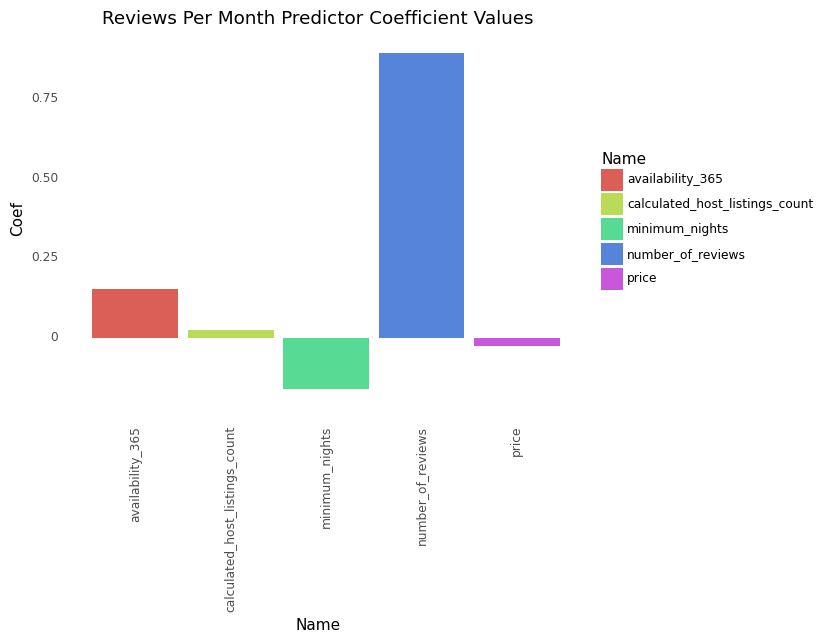

<ggplot: (8746643927157)>

In [ ]:
(ggplot(coefficients4, aes(x = "Name" , y = "Coef", fill = "Name")) 
+ geom_bar(stat = "identity") 
+ theme_minimal() 
+ labs(title = "Reviews Per Month Predictor Coefficient Values") 
+ theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(angle = 90)))

This bar chart shows the coefficients of each variable being compared for reviews per month. The "number_of_reviews" variable positively affects reviews per month the most while "minimum_nights" negatively affects reviews per month the most. 

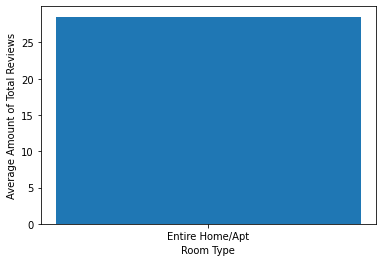

In [ ]:
entire = nyc.loc[nyc['room_type'] == "Entire home/apt"]
entirereviews = entire["number_of_reviews"].mean()

e_reviews = {"Entire Home/Apt": entirereviews}

plt.bar(list(e_reviews.keys()), e_reviews.values())
plt.xlabel('Room Type')
plt.ylabel('Average Amount of Total Reviews')
plt.show()


This bar chart shows the average number of reviews total an entire home/apt has.

Answer: From looking at the coefficients of the variables affecting reviews per month, we can see that “number_of_reviews” positively affects reviews per month the most while "minimum_nights" negatively affects reviews per month the most. I came to this answer by making a linear regression between all the continuous variables and setting the why value to “reviews_per_month” since that’s what we are trying to understand. With the coefficient variables, we can see with one standard deviation increase, the variable “number_of_reviews” gets positively affected the most and vice versa for “minimum_nights”. We can further understand this by stating that when there are more reviews per month, that means there are more “number_of_reviews” which would make sense as more reviews are made. Additionally, it can be noted that minimum nights are most likely to be smaller with there being a higher amount of monthly reviews. These are the two variables that affect reviews per month the most and show the most change once a standard deviation of “reviews_per_month” is increased by 1.

### 5) Differentiate prices among available room types.

I made the first bar chart show the average price of renting each room type per night. This was more specific.

In [ ]:
entire = nyc.loc[nyc['room_type'] == "Entire home/apt"]
entireprice = entire["price"].mean()

private = nyc.loc[nyc['room_type'] == "Private room"]
privateprice = private["price"].mean()

shared = nyc.loc[nyc['room_type'] == "Shared room"]
sharedprice = shared["price"].mean()

In [ ]:
X = nyc["price"]

print("The average price to rent an entire home or apartment per night is $", entireprice)
print("The average price to rent a private room per night is $", privateprice)
print("The average price to rent a shared room per night is $", sharedprice)

The average price to rent an entire home or apartment per night is $ 196.2940684635058
The average price to rent a private room per night is $ 83.9810925559015
The average price to rent a shared room per night is $ 63.21394799054374


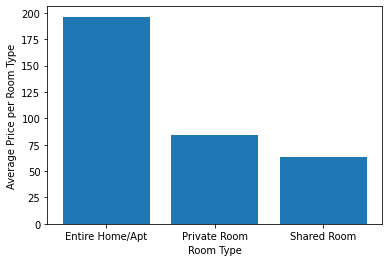

In [ ]:
room_avgprice = {"Entire Home/Apt": entireprice, "Private Room": privateprice, "Shared Room": sharedprice}

plt.bar(list(room_avgprice.keys()), room_avgprice.values())
plt.xlabel('Room Type')
plt.ylabel('Average Price per Room Type')
plt.show()

This bar chart shows the average price per room type available on AirBnB. As shown, the average price of renting an entire home/apt per night costs the most at 196.29 Dollars while the private room per night costs 83.98 Dollars and the shared room per night costs 63.21 Dollars on average.

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365","Bronx", "Brooklyn","Manhattan","Queens","Staten Island"]
X = nyc[predictors]
y = nyc["price"]

z = StandardScaler()
z.fit(X)

lr = LinearRegression()
lr.fit(X,y)

coefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(coefficients)

        Coef                            Name
0  -0.006605                  minimum_nights
1  -0.167716               number_of_reviews
2  -1.255624               reviews_per_month
3   0.097050  calculated_host_listings_count
4   0.152136                availability_365
5 -36.775804                           Bronx
6  13.857384                        Brooklyn
7  70.922235                       Manhattan
8 -17.115196                          Queens
9 -30.888618                   Staten Island


In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Bronx", "Brooklyn","Manhattan","Queens","Staten Island"]
X = entire[predictors]
y = entire["price"]

z = StandardScaler()
z.fit(X)

lr = LinearRegression()
lr.fit(X,y)

entirecoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(entirecoefficients)

        Coef                            Name
0  -0.571188                  minimum_nights
1  -0.336887               number_of_reviews
2  -1.173816               reviews_per_month
3  -0.161149  calculated_host_listings_count
4   0.289018                availability_365
5 -42.890892                           Bronx
6  24.082687                        Brooklyn
7  80.489396                       Manhattan
8 -18.084462                          Queens
9 -43.596730                   Staten Island


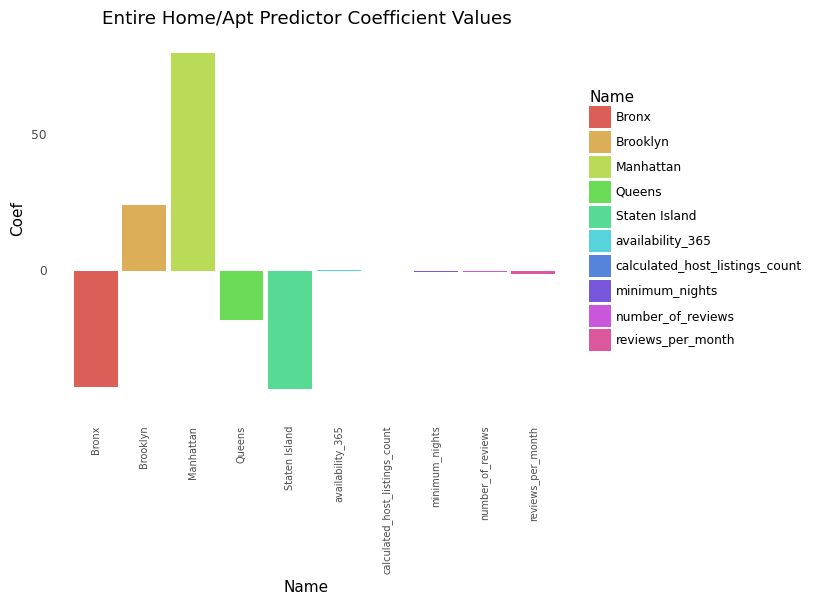

<ggplot: (8746654361025)>

In [ ]:
(ggplot(entirecoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) 
+ geom_bar(stat = "identity") 
+ theme_minimal() 
+ labs(title = "Entire Home/Apt Predictor Coefficient Values") 
+ theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90)))

This bar chart shows the coefficients of each variable being compared for an entire home/apt. The "Manhattan" variable positively affects price the most while "Staten Island" negatively affects price the most.

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Bronx", "Brooklyn","Manhattan","Queens","Staten Island"]
X = private[predictors]
y = private["price"]

z = StandardScaler()
z.fit(X)

lr = LinearRegression()
lr.fit(X,y)

privatecoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(privatecoefficients)

        Coef                            Name
0   0.420999                  minimum_nights
1  -0.064780               number_of_reviews
2  -0.035154               reviews_per_month
3   0.145128  calculated_host_listings_count
4   0.060411                availability_365
5 -16.478909                           Bronx
6   2.780048                        Brooklyn
7  36.526572                       Manhattan
8  -3.650113                          Queens
9 -19.177598                   Staten Island


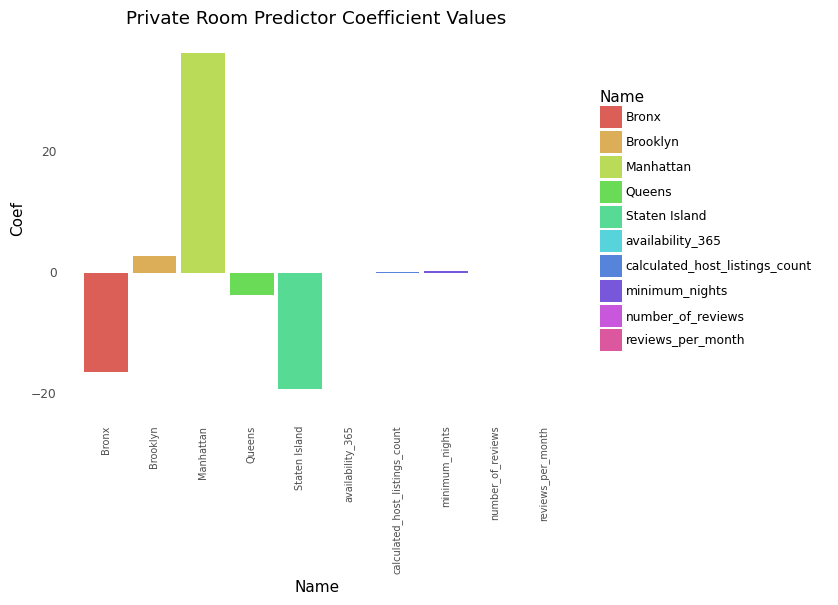

<ggplot: (8746644287265)>

In [ ]:
(ggplot(privatecoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) 
+ geom_bar(stat = "identity") 
+ theme_minimal() 
+ labs(title = "Private Room Predictor Coefficient Values") 
+ theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90)))

This bar chart shows the coefficients of each variable being compared for a private room. The "Manhattan" variable positively affects price the most while "Staten Island" negatively affects price the most.

In [ ]:
predictors = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "Bronx", "Brooklyn","Manhattan","Queens","Staten Island"]
X = shared[predictors]
y = shared["price"]

z = StandardScaler()
z.fit(X)

lr = LinearRegression()
lr.fit(X,y)

sharedcoefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
print(sharedcoefficients)

        Coef                            Name
0  -0.444209                  minimum_nights
1  -0.049496               number_of_reviews
2  -6.344439               reviews_per_month
3  -1.359698  calculated_host_listings_count
4   0.000499                availability_365
5  -5.825936                           Bronx
6 -13.416647                        Brooklyn
7  19.260815                       Manhattan
8   4.002060                          Queens
9  -4.020291                   Staten Island


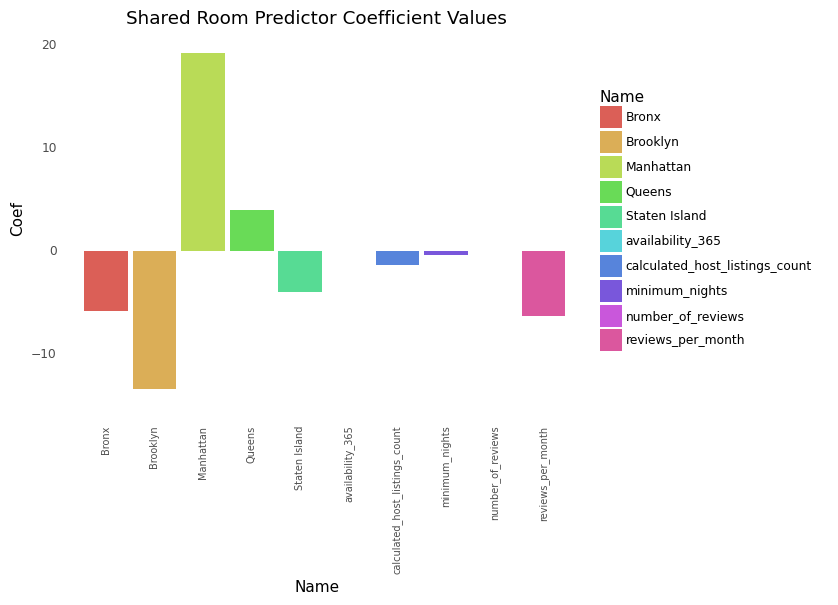

<ggplot: (8746657093217)>

In [ ]:
(ggplot(sharedcoefficients, aes(x = "Name" , y = "Coef", fill = "Name")) 
+ geom_bar(stat = "identity") 
+ theme_minimal() 
+ labs(title = "Shared Room Predictor Coefficient Values") 
+ theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90)))

This bar chart shows the coefficients of each variable being compared for a shared room. The "Manhattan" variable positively affects price the most while "Brooklyn" negatively affects price the most.

Answer: With looking at how prices affect the different room types, we see consistently that Manhattan has the highest prices for all 3 available room types as shown as it is the largest coefficient for each of the room types. Additionally, Staten Island has the lowest prices for an entire home/apt as well as a private room while Brooklyn has the lowest price for a shared room. We know this by looking at the most positive coefficient per room type and the most negative one. When a room becomes more expensive, it is more likely for it to be in Manhattan, and vice versa for Staten Island and Brooklyn. Additionally, we have the average price per night for the three types of rooms available as listed above.

### 6) Which are the most popular locations to rent “Entire home/ apartment”?

I did not do a lasso model but rather a logistic model since we are able to look at the coefficients per borough and see which one is most positively correlated with the variable "Entire home/apt". I did a bar plot showing the coefficients and a second one showing the total count of available entire home/apt for rent per borough.

,predictors,coefficients
0,Bronx,-0.472212
1,Brooklyn,0.118049
2,Manhattan,0.534827
3,Queens,-0.353091
4,Staten Island,0.042517
5,intercept,-0.132555


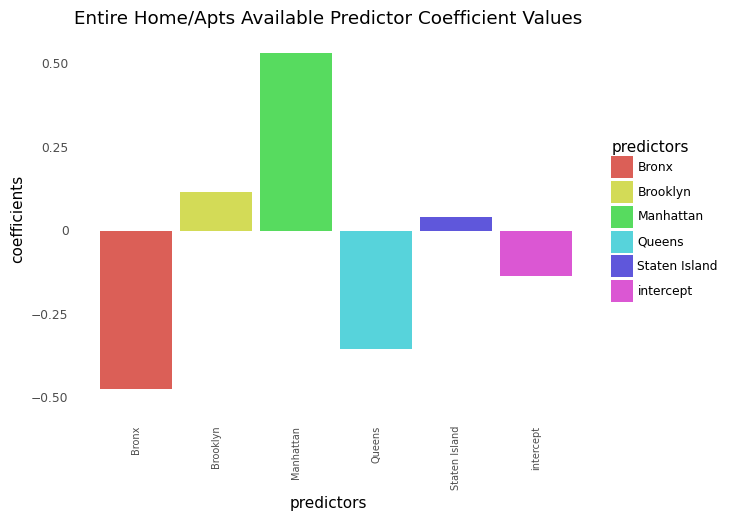

<ggplot: (8746654356173)>

In [ ]:
predictors = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
X = nyc[predictors]
y = nyc["Entire home/apt"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

log_model = LogisticRegression()
log_model.fit(X, y)

#put coefficients in data frame
coefs = pd.DataFrame({"predictors": predictors, "coefficients":log_model.coef_[0]})
coefs = coefs.append({"coefficients": log_model.intercept_[0], 
                      "predictors": "intercept"}, ignore_index = True)
display(coefs)

(ggplot(coefs, aes(x = "predictors" , y = "coefficients", fill = "predictors")) 
+ geom_bar(stat = "identity") 
+ theme_minimal() 
+ labs(title = "Entire Home/Apts Available Predictor Coefficient Values") 
+ theme(panel_grid_major_x = element_blank(), 
      panel_grid_major_y = element_blank(), 
      panel_grid_minor_y = element_blank(), 
       axis_text_x = element_text(size = 7, angle = 90)))


This bar chart shows the coefficients of each variable being compared for a entire home/apt. The "Manhattan" variable positively affects the room type the most while "Bronx" negatively affects the room type the most.

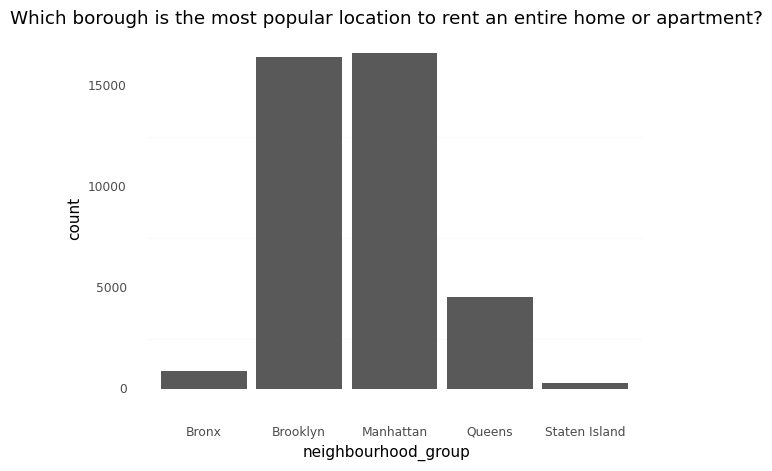

<ggplot: (8746643900249)>

In [ ]:
(ggplot(nyc, aes(x = "neighbourhood_group", fill = "y")) 
+ geom_bar() + theme_minimal() + theme(panel_grid_major = element_blank()) 
+ labs(title = "Which borough is the most popular location to rent an entire home or apartment?"))

The bar graph above shows the amount of entire home/apts available to rent per borough. As seen, Manhattan has the most listings followed closely behind by Brooklyn. Staten Island has the least amount of AirBnB listings available for rent.

Answer: The most popular place to rent an entire home or apartment is Manhattan. This can be seen in the bar chart showing all the neighbourhood groups and the counts of each, showing the total available AirBnB’s per borough, with Manhattan having the most and Staten Island the least. We can further understand what the most popular location to rent an entire home/apt is by looking at the coefficients listed and shown in the rainbow graph. The most positive coefficient is for Manhattan which is 0.534827, showing that for one standard deviation increase in the entire home/apt, Manhattan increases by that amount, being the most prevalent between the 5 boroughs. Although Staten Island has the least available AirBnBs, the Bronx is the least popular place to rent in as it has the most negative coefficient.


### 7) Does the amount of monthly reviews a listing receives have an affect on price?

Question was altered from: Does the amount of listings a host has affect how many reviews they receive? (more experienced hosters possibly receiving more reviews).  Because when initially plotting reviews_per_month against host_listings_count, the result was a plot that had zero potential to be somewhat accurately clustered.


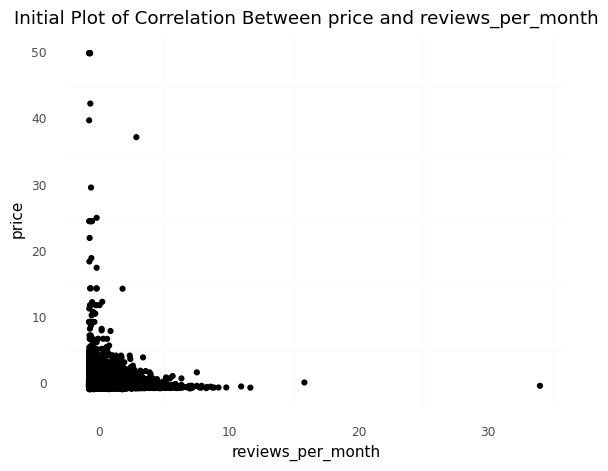

<ggplot: (8746644289341)>

In [ ]:
#Create plot to decide which clustering algorithm to utilize
z = StandardScaler()
nyc[["reviews_per_month","price"]] = z.fit_transform(nyc[["reviews_per_month","price"]])

ggplot(nyc, aes(x = "reviews_per_month", y = "price")) + geom_point() + theme_minimal() + theme(panel_grid_major = element_blank())+ labs(title = "Initial Plot of Correlation Between price and reviews_per_month")

This simple plot is used to visualize the data we will be analyzing and used to determine which clustering algorithm will work best on the given data.  Unfortunately, the plot shows little distinct clustering and contains a small amount of noise, so it can be determined that DBSCAN would be a good choice of clustering method.

In [ ]:
#Elbow method to find eps
mins = 1

nn = NearestNeighbors(mins + 1)

nn.fit(nyc[["reviews_per_month", "price"]])

distances, neighbors = nn.kneighbors(nyc[["reviews_per_month", "price"]])

distances

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
#sort distances
distances = np.sort(distances[:, mins], axis = 0)

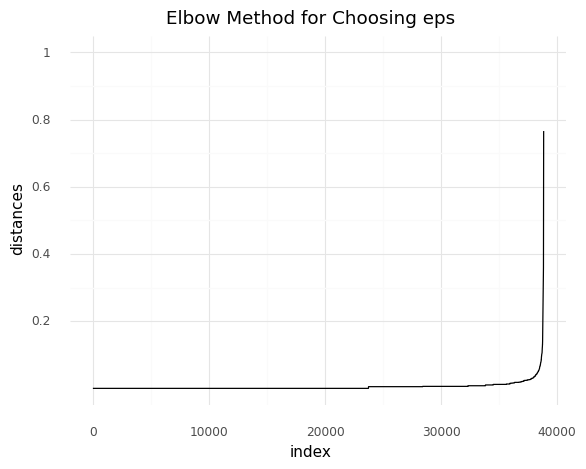

<ggplot: (8746643870717)>

In [ ]:
#plot elbow method
distances_df = pd.DataFrame({"distances": distances,
                            "index": list(range(0,len(distances)))})

plot = (ggplot(distances_df, aes(x = "index", y = "distances"))+
       geom_line() + scale_y_continuous(limits = (0,1), breaks = (0.2, 0.4,0.6,0.8,1))
                                        + theme_minimal() + labs(title = "Elbow Method for Choosing eps"))

plot

This plot is the elbow method which is utilized to determine the eps parameter for the DBSCAN model.  You determine the eps by finding the inflection point of the plot, which in this case appears to be around 0.1.

In [ ]:
#DBSCAN

#eps of 0.1 from elbow method, min_samples so high because working with extremely large dataset with almost 40,000 rows 
db = DBSCAN(eps = 0.1, min_samples = 60).fit(nyc[["reviews_per_month", "price"]])

labsList = ["Noise"]
labsList = labsList + ["Cluster "+ str(i) for i in range(1,len(set(db.labels_)))]

nyc["assignments"] = db.labels_

data = nyc.loc[(nyc.assignments >= 0)]

print("DBSCAN Silhouette Score:",silhouette_score(data[["reviews_per_month","price"]], data["assignments"]))

DBSCAN Silhouette Score: 0.454005337098693


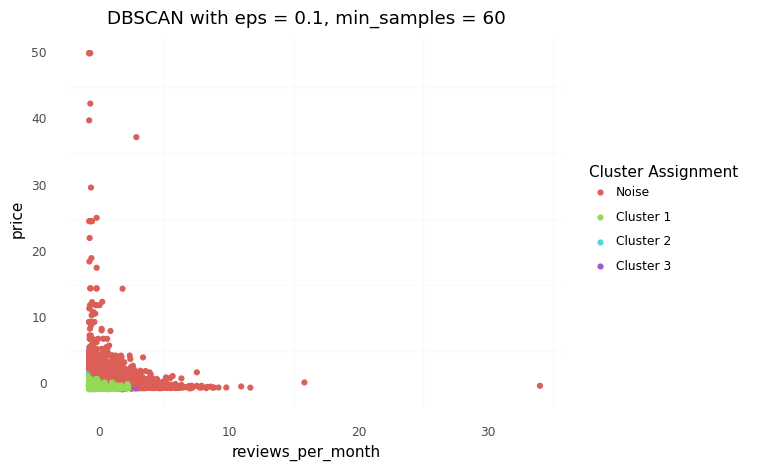

<ggplot: (8746644850821)>

In [ ]:
#plot of DBSCAN with eps of 0.1, min_samples of 60
(ggplot(nyc, aes(x = "reviews_per_month", y = "price", color = "factor(assignments)")) +
geom_point()+ theme_minimal() +theme(panel_grid_major = element_blank())+ scale_color_discrete(name = "Cluster Assignment",
                                                    labels = labsList) + 
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.1, min_samples = 60"))

This plot displays the result of the running the clustering model against the data.  It depicts the poor correlation between price and reviews_per_month, as there are no clear and distinct clusters, instead most of the data has been clustered as noise and the three clusters that are plotted are barely visible.

a) To answer the question, I first plotted the data in order to decide which clustering algorithm to utilize and by doing this I decided DBSCAN would be optimal due to the fact that there is some noise in the data and the data is barely clustered and they are oddly shaped.  I then utilized the elbow method to decide for the eps parameter that I will use and set the min_samples to a high value of 60 because of how large the dataset is that we are working with.  I then created the DBSCAN model and plotted the outcome, which produced a low silhouette score of 45.4%.

b) In order to determine if the price of a listing affects the number reviews a listing receives per month, one can look at the plot and whether there are distinguished and clear clusters within the data.  If there are clear clusters in the plot, it means that specific ranges of prices tend to have an impact on the number of reviews per month, depicting a correlation between the two variables.  However, looking at the plot that was produced by this DBSCAN model, there appear to be no clear clusters with good separation, indication that there is not much correlation between the two variables.  This could have been observed after the initial plot when there seemed to be a desparity of distinct clusters within the data.  Therefore, the price of a listing does not have a strong affect on the number of reviews a listing receives per month. 

c) See captions under each plot.

8) Is there any noticeable difference in the number of reviews among different neighborhoods and what could be the reason for it?

In [ ]:
#set predictors, train test split for linear model to predict number_of_reviews
predictors = ["price","minimum_nights", "calculated_host_listings_count", "availability_365","Bronx", "Brooklyn","Manhattan","Queens","Staten Island", "Entire home/apt","Private room", "Shared room"]
x = nyc[predictors]
y = nyc["number_of_reviews"]

x_train, x_test, y_train, y_test = train_test_split(nyc[predictors], nyc["number_of_reviews"], test_size=0.2)

z = StandardScaler()
z.fit(x_train[["price","minimum_nights", "calculated_host_listings_count"]])
x_train[["price","minimum_nights", "calculated_host_listings_count"]] = z.transform(x_train[["price","minimum_nights", "calculated_host_listings_count"]])


x_test[["price","minimum_nights", "calculated_host_listings_count"]] = z.transform(x_test[["price","minimum_nights", "calculated_host_listings_count"]])

In [ ]:
#create linear regression model to predict for number_of_reviews
lr = LinearRegression()
lr.fit(x_train,y_train)

coefficient = pd.DataFrame({"Coef":lr.coef_,
              "Variable": predictors})
print(coefficient)

        Coef                        Variable
0  -2.546988                           price
1  -3.897571                  minimum_nights
2  -4.479889  calculated_host_listings_count
3   0.082537                availability_365
4  -0.232761                           Bronx
5   0.488616                        Brooklyn
6   0.298340                       Manhattan
7   1.594103                          Queens
8  -2.148298                   Staten Island
9   5.266829                 Entire home/apt
10  3.693147                    Private room
11 -8.959976                     Shared room


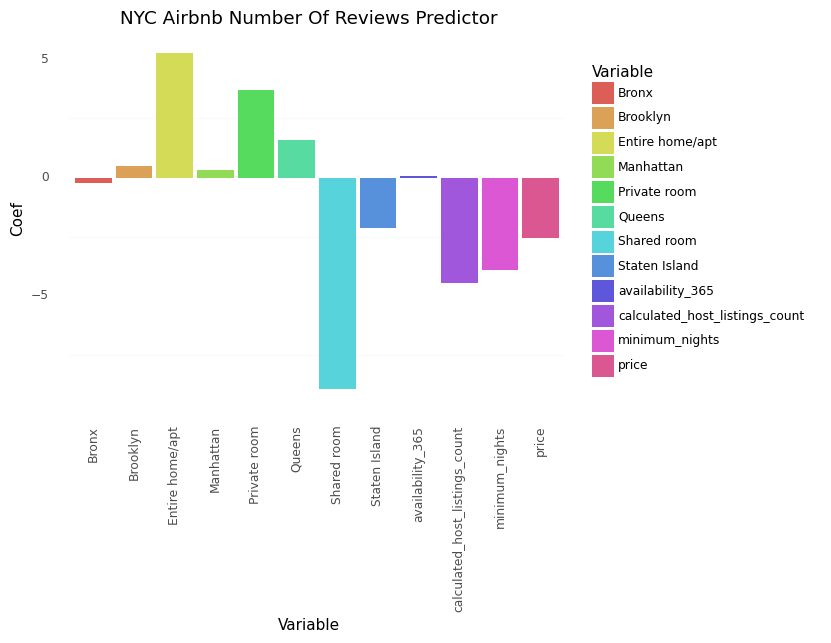

<ggplot: (8746643868149)>

In [ ]:
#plot the coefficients the model produced
(ggplot(coefficient, aes(x = "Variable", y = "Coef", fill = "Variable"))+ geom_bar(stat = "identity") + 
 theme_minimal()+labs(title = "NYC Airbnb Number Of Reviews Predictor")+ theme(panel_grid_major = element_blank(), axis_text_x = element_text(angle = 90)))

This plot visualizes the coefficients of each predictor when it comes to predicting for number_of_reviews.  This data visualization clearly depicts the significnace each variable has in predicting number of reviews and it can be interpreted for the different neighborhoods, Queens has the most positive correlation with number of reviews, followed by Brooklyn and Manhattan respectively and the Bronx has the lowest positive correlation out of all the neighborhoods.

In [ ]:
#set predictors, train test split to prepare for logistic model to predict for the location being Queens
predictors = ["price","minimum_nights", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
x = nyc[predictors]
y = nyc["Queens"]

x_train, x_test, y_train, y_test = train_test_split(nyc[predictors], nyc["Queens"], test_size=0.2)

z = StandardScaler()
z.fit(x_train[["price","minimum_nights", "calculated_host_listings_count"]])
x_train[["price","minimum_nights", "calculated_host_listings_count"]] = z.transform(x_train[["price","minimum_nights", "calculated_host_listings_count"]])


x_test[["price","minimum_nights", "calculated_host_listings_count"]] = z.transform(x_test[["price","minimum_nights", "calculated_host_listings_count"]])

In [ ]:
#run logistic regression model to predict for the location being Queens
lr = LogisticRegression()
lr.fit(x_train,y_train)

coefl = lr.coef_[0]
coef = np.exp(coefl) 
interceptl = lr.intercept_[0]
intercept = np.exp(interceptl)

coefs = pd.DataFrame({"Variable":predictors,"Coef(Odds)":coef, "Coef(LogOdds)":coefl})
coefsintercept = coefs.append({"CoefOdds": intercept, "CoefLogOdds": interceptl,
                               "Predictors": "intercept"}, ignore_index = True)
print(coefs)

                         Variable  Coef(Odds)  Coef(LogOdds)
0                           price    0.118909      -2.129395
1                  minimum_nights    0.613995      -0.487768
2  calculated_host_listings_count    0.903973      -0.100956
3                availability_365    1.003039       0.003034
4                 Entire home/apt    0.641648      -0.443715
5                    Private room    0.470634      -0.753675
6                     Shared room    0.394934      -0.929036


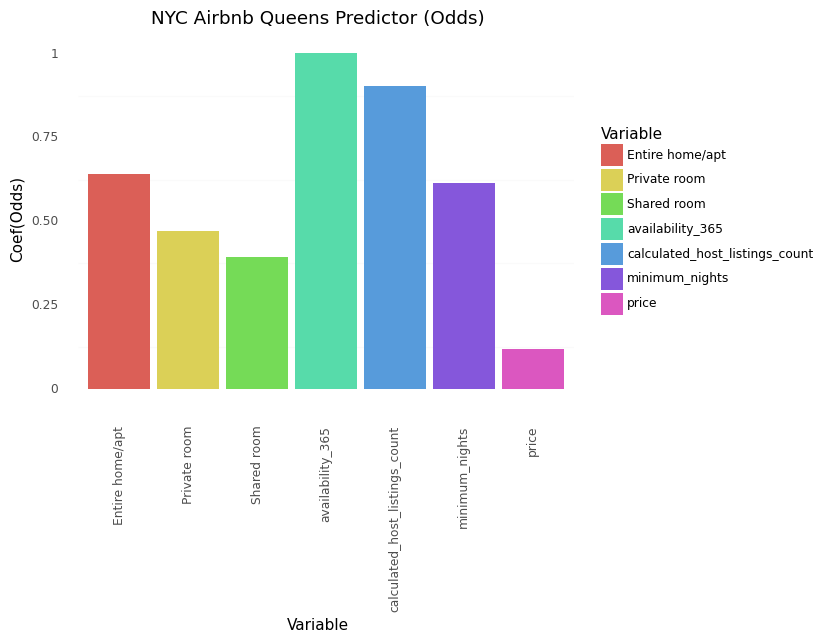

<ggplot: (8746644847257)>

In [ ]:
#plot coefficients the logistic model produced
(ggplot(coefs, aes(x = "Variable", y = "Coef(Odds)", fill = "Variable"))+ geom_bar(stat = "identity") + 
 theme_minimal()+labs(title = "NYC Airbnb Queens Predictor (Odds)")+ theme(panel_grid_major = element_blank(),axis_text_x = element_text(angle = 90)))

This bar plot depicts the odds coefficients of each variable when it comes to predicting whether the neighborhood of the listing is Queens. 

In [ ]:
#set predictors and train test split to prepare for logistic model to predict for location being Bronx
predictors = ["price","minimum_nights", "calculated_host_listings_count", "availability_365", "Entire home/apt","Private room", "Shared room"]
x = nyc[predictors]
y = nyc["Bronx"]

x_train, x_test, y_train, y_test = train_test_split(nyc[predictors], nyc["Bronx"], test_size=0.2)

z = StandardScaler()
z.fit(x_train[["price","minimum_nights", "calculated_host_listings_count"]])
x_train[["price","minimum_nights", "calculated_host_listings_count"]] = z.transform(x_train[["price","minimum_nights", "calculated_host_listings_count"]])


x_test[["price","minimum_nights", "calculated_host_listings_count"]] = z.transform(x_test[["price","minimum_nights", "calculated_host_listings_count"]])

In [ ]:
#logistic regression to predict whether the location being in the Bronx
lr = LogisticRegression()
lr.fit(x_train,y_train)

coefl2 = lr.coef_[0]
coef2 = np.exp(coefl2) 
interceptl2 = lr.intercept_[0]
intercept2 = np.exp(interceptl)

coefs2 = pd.DataFrame({"Variable":predictors,"Coef(Odds)":coef2, "Coef(LogOdds)":coefl2})
coefsintercept2 = coefs2.append({"CoefOdds": intercept2, "CoefLogOdds": interceptl2,
                               "Predictors": "intercept"}, ignore_index = True)
print(coefs2)

                         Variable  Coef(Odds)  Coef(LogOdds)
0                           price    0.034322      -3.371974
1                  minimum_nights    0.592214      -0.523887
2  calculated_host_listings_count    0.302962      -1.194149
3                availability_365    1.004265       0.004256
4                 Entire home/apt    0.417963      -0.872362
5                    Private room    0.220693      -1.510983
6                     Shared room    0.240347      -1.425672


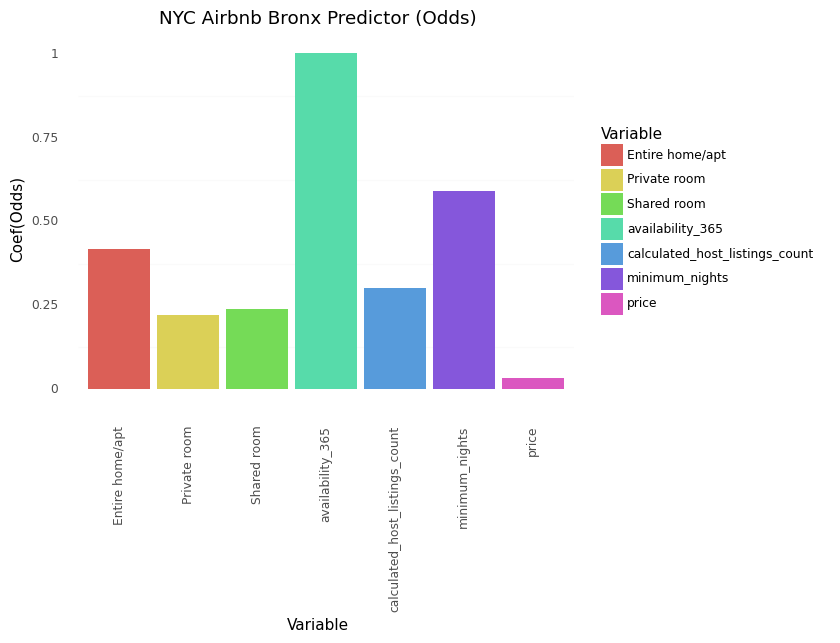

<ggplot: (8746644705569)>

In [ ]:
#plot the coefficients produced by the logistic model
(ggplot(coefs2, aes(x = "Variable", y = "Coef(Odds)", fill = "Variable"))+ geom_bar(stat = "identity") + 
 theme_minimal()+labs(title = "NYC Airbnb Bronx Predictor (Odds)")+ theme(panel_grid_major = element_blank(),axis_text_x = element_text(angle = 90)))

This bar plot depicts the odds coefficients of each variable when it comes to predicting whether the neighborhood of the listing is the Bronx. 

a) In order to answer the question of whether there is a noticeable difference in the number of reviews among different neighborhoods and if we could determine a reason, I first created a linear regression model in which I used the variables price, minimum_nights, calculated_host_listings_count, availability_365, and the dummy variables for the different neighborhood_group and room_type to predict for the variable number_of_reviews.  I then printed out the coefficients that the model produced and plotted them.  I found that of all the neighborhood groups, Queens had the highest correlation to the number of reviews and the Bronx had the lowest correlation to the number of reviews a listing received.  I then created two logistic regression models for the two burrows Bronx and Queens since they had the highest difference in affect on number_of_reviews.  I used predictors price, minimum_nights, calculated_host_listings_count, availability_365, and the dummy variables for room_type.  I did this to see if there were differences in the coefficients for these variables that could possibly account for the difference seen earlier in the linear model.  I then plotted the coefficients of both logistic regression models to visualize if there was any difference.

b)  The first part of the question asks whether there is a notable difference in the number of reviews among different neighborhoods and this was answered through the linear regression model.  The coefficients produced display the signifigance each variable has when it comes to predicting for the variable number_of_reviews.  The higher the coefficient the more correlated that variable is to the outcome (in this case number_of_reviews).  Looking at the results of the linear model, there does seem to be significant differences in coefficients of each neighborhood.  With the most positively correlated neighborhood being Queens with a coefficient of 1.59 and the most negatively correlated neighborhood being the Bronx with a coefficient of -1.78.  This difference between the two indicate that if the listing were to be in Queens, the number of reviews on the listing are likely higher than the number if it were to be located in the Bronx.  The difference between the neighborhoods is significant enough to note that yes, there is a notable difference in the number of reviews among the different neighborhoods.  The second part of the question asks what factors could contribute to this difference?  This was attempted to be answered by the two logistic regression models that were created that predicted whether the listing was located in Queens or the Bronx.  The odds coefficients of the logistic models indicate that there are indeed potential factors that could be responsible for the difference in coefficients in the first linear model between Queens and Bronx.  Looking at the coefficients output from the two logistic regression models, it can be interpreted that price, calculated_host_listings_count, Shared room, and Private room all have different roles when it comes to predicting if a listing is located in the Bronx or Queens.  This means that these variables are possible explinations for the difference in coefficients in the initial linear model, meaning that the factors price, calculated_host_listings_count, Shared room, and Private room are possible reasons why listings in Queens receive more reviews than listings in the Bronx.

c) See captions under plots.

9) Which neighborhoods and room types optimize the pricing of a listing?

In [ ]:
#Set predictors, train test split to prepare for Lasso Model
predictorsl = ["Bronx", "Brooklyn", "Manhattan", "Queens","Entire home/apt","Private room", "Shared room"]
x = nyc[predictorsl]
y = nyc["price"]

x_train, x_test, y_train, y_test = train_test_split(nyc[predictorsl], nyc["price"], test_size=0.2)
x_train.head()

,Bronx,Brooklyn,Manhattan,Queens,Entire home/apt,Private room,Shared room
2564,0,1,0,0,0,1,0
40271,0,0,1,0,0,1,0
19523,0,1,0,0,0,1,0
8781,0,1,0,0,1,0,0
9989,0,1,0,0,1,0,0


In [ ]:
#Lasso Model
lsr = Lasso()
lsr.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#Calculate MSE for training and testing
print("TRAIN: ", mean_absolute_error(y_train, lsr.predict(x_train)))
print("TEST : ", mean_absolute_error(y_test, lsr.predict(x_test)))

TRAIN:  60.803376863554625
TEST :  63.54824910296917


In [ ]:
coefficient = pd.DataFrame({"Coef":lsr.coef_,
              "Variable": predictors})
print(coefficient)

         Coef         Variable
0   -0.000000            Bronx
1    0.000000         Brooklyn
2   47.312464        Manhattan
3   -1.670414           Queens
4  102.255907  Entire home/apt
5   -0.000000     Private room
6   -0.000000      Shared room


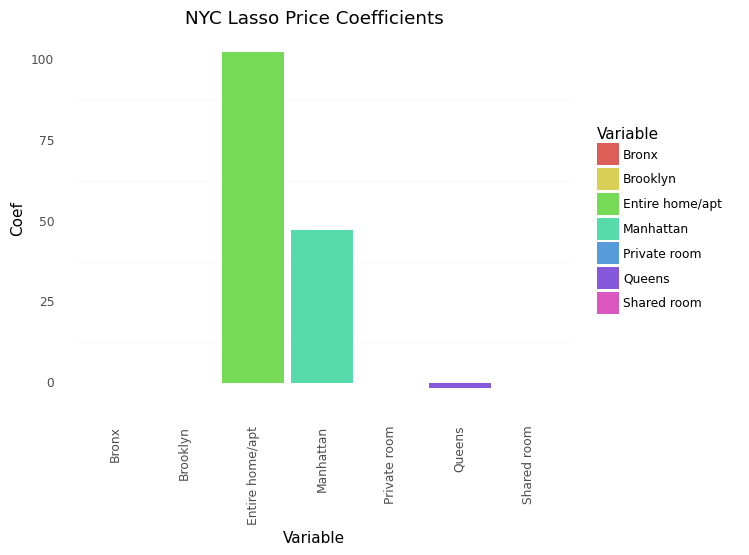

<ggplot: (8746644670681)>

In [ ]:
(ggplot(coefficient, aes(x = "Variable", y = "Coef", fill = "Variable"))+ geom_bar(stat = "identity") + 
theme_minimal()+ labs(title = "NYC Lasso Price Coefficients")+ theme(panel_grid_major = element_blank(),
                                                                    axis_text_x = element_text(angle =90)))

This bar plot clearly depicts the variables the lasso model deemed to be most significant when it came to predicting for price.  It is clear lasso did its job because the variables it deemed insignificant were set to 0.

In [ ]:
#set predictors, train test split for linear model to predict number_of_reviews
predictors = ["Manhattan","Queens", "Entire home/apt"]
x = nyc[predictors]
y = nyc["price"]

x_train, x_test, y_train, y_test = train_test_split(nyc[predictors], nyc["price"], test_size=0.2)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

coefficient = pd.DataFrame({"Coef":lr.coef_,
              "Variable": predictors})
print(coefficient)

         Coef         Variable
0   49.908804        Manhattan
1  -12.974850           Queens
2  106.115850  Entire home/apt


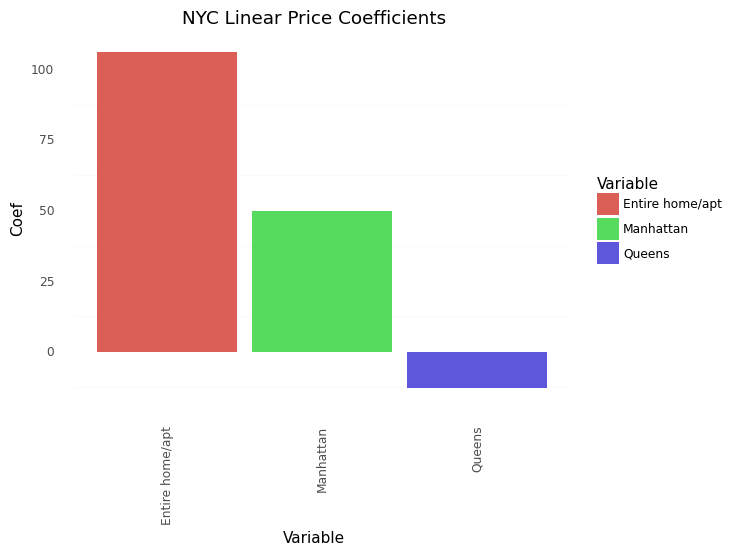

<ggplot: (8746644858597)>

In [ ]:
(ggplot(coefficient, aes(x = "Variable", y = "Coef", fill = "Variable"))+ geom_bar(stat = "identity") + 
theme_minimal()+ labs(title = "NYC Linear Price Coefficients")+ theme(panel_grid_major = element_blank(),
                                                                    axis_text_x = element_text(angle =90)))

This plot depicts a linear regression model using the three variables that the lasso model deemed to be most significant against price.  It is clear that Entire home/apt has the highest impact on price out of the three and the location being Queens has the worst impact on price of the listing.

a) In order to determine which variables were most significant when predicting for the price of the listing, we utilized a Lasso regularization model.  We set the predictors to be the dummy variables for the variables room_type and neighbourhood_group and set the y to the variable price.  We then created a dataframe containing the coefficients of the Lasso model and plotted the coefficients.  We then created a linear regression model using the three coefficeints the Lasso model deemed to be most significant and plotted the resulting coefficients of this linear model.

b). Based on the coefficients given to us from the Lasso model, we found that the neighborhoods and room types that have the most impact on the pricing of the listing were the Entire home/apt. room type and the neighborhood of Manhattan.  On the other hand, we found the neighborhood of Queens to have a highly negative impact on the price of the listing. 